<a href="https://colab.research.google.com/github/fasthill/ML-DL-study-alone/blob/main/5-1%20%EA%B2%B0%EC%A0%95%20%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analyse from LightGBM

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/5-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import datetime
import os, re

In [2]:
from xgboost import XGBClassifier
import xgboost
from lightgbm import LGBMClassifier
import lightgbm
import joblib

In [3]:
from sklearn.linear_model import LogisticRegression, SGDClassifier, SGDRegressor
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [4]:
import pickle

# write list, dictionary to pickle
def save_to_pickle(path, filename):
    open_file = open(path, "wb")
    pickle.dump(filename, open_file)
    open_file.close()

# read list, dictionary from pickle
def load_from_pickle(path):
    open_file = open(path, "rb")
    loaded_file = pickle.load(open_file)
    open_file.close()
    return loaded_file

In [5]:
import csv

# write list, dictionary to csv
# path = './xxx/', my_dict = filename

def save_dict_to_csv(path, my_dict):
    df = pd.DataFrame.from_dict(my_dict, orient='index') 
    df.to_csv (path, index=False, header=True)  
    
def save_list_to_csv(path, my_list):
    df = pd.DataFrame(my_list, columns=['columns'])
    df.to_csv (path, index=False, header=True) 
    
# def load_dict_from_csv(path):
#     df = pd.read_csv(path, header=None)
#     my_dict = df.to_dict()
#     return my_dict

In [6]:
def predict_p(test_target, y_predict_list): 
    ps = precision_score(test_target, y_predict_list)
    rs = recall_score(test_target, y_predict_list)
    fs = f1_score(test_target, y_predict_list)
    roc = roc_auc_score(test_target, y_predict_list)
    collect_list = [ps, rs, fs, roc]
    return collect_list

In [7]:
def make_df_from_estimator(estimator, num):
    df_t = pd.DataFrame.from_dict(estimator, orient='index')
    df_t.columns = [f'value{num}']
    df_t.index.name = 'parameter'
    return df_t

In [8]:
def calc_results(model, train_scaled, val_scaled, test_scaled, train_target, val_target, test_target,
                 test_scaled1, test_scaled2, test_scaled3, test_target1, test_target2, test_target3):
# model = lgbmgs.best_estimator_  # 최적의 파라미터로 모델 생성
    y_predict = model.predict(test_scaled)
    result_dict= {}
    result_dict['best_score'] = lgbmgs.best_score_ 
    result_dict['best_index'] = lgbmgs.best_index_
    result_dict['acc_train'] = model.score(train_scaled, train_target)
    result_dict['acc_val'] = model.score(val_scaled, val_target)
    result_dict['acc_test'] = model.score(test_scaled, test_target)
    result_dict['precision'] = precision_score(test_target, y_predict)
    result_dict['recall'] = recall_score(test_target, y_predict)
    result_dict['f1score'] = f1_score(test_target, y_predict)
    result_dict['roc'] = roc_auc_score(test_target, y_predict)
    cm = confusion_matrix(test_target, y_predict)
    result_dict['tn'] = cm[0,0]
    result_dict['fp'] = cm[0,1]
    result_dict['fn'] = cm[1,0]
    result_dict['tp'] = cm[1,1]
    #------------------------------------
    y_predict = model.predict(test_scaled1)
    result_dict['acc_test1'] = model.score(test_scaled1, test_target1)
    result_dict['precision1'] = precision_score(test_target1, y_predict)
    result_dict['recall1'] = recall_score(test_target1, y_predict)
    result_dict['f1score1'] = f1_score(test_target1, y_predict)
    result_dict['roc1'] = roc_auc_score(test_target1, y_predict)
    cm = confusion_matrix(test_target1, y_predict)
    result_dict['tn1'] = cm[0,0]
    result_dict['fp1'] = cm[0,1]
    result_dict['fn1'] = cm[1,0]
    result_dict['tp1'] = cm[1,1]
    #------------------------------------
    y_predict = model.predict(test_scaled2)
    result_dict['acc_test2'] = model.score(test_scaled2, test_target2)
    result_dict['precision2'] = precision_score(test_target2, y_predict)
    result_dict['recall2'] = recall_score(test_target2, y_predict)
    result_dict['f1score2'] = f1_score(test_target2, y_predict)
    result_dict['roc2'] = roc_auc_score(test_target2, y_predict)
    cm = confusion_matrix(test_target2, y_predict)
    result_dict['tn2'] = cm[0,0]
    result_dict['fp2'] = cm[0,1]
    result_dict['fn2'] = cm[1,0]
    result_dict['tp2'] = cm[1,1]
    #------------------------------------
    y_predict = model.predict(test_scaled3)
    result_dict['acc_test3'] = model.score(test_scaled3, test_target3)
    result_dict['precision3'] = precision_score(test_target3, y_predict)
    result_dict['recall3'] = recall_score(test_target3, y_predict)
    result_dict['f1score3'] = f1_score(test_target3, y_predict)
    result_dict['roc3'] = roc_auc_score(test_target3, y_predict)
    cm = confusion_matrix(test_target3, y_predict)
    result_dict['tn3'] = cm[0,0]
    result_dict['fp3'] = cm[0,1]
    result_dict['fn3'] = cm[1,0]
    result_dict['tp3'] = cm[1,1]
    return result_dict

In [9]:
# save parameters and columns used for the analysis
def save_parameters(iter, com_name, dt, precision, params_o, new_col):
    save_to_pickle(f'./{com_name}/params_{dt}_{round(precision*100):2d}%_ver{iter}.pkl', params_o)
    save_dict_to_csv(f'./{com_name}/params_{dt}_{round(precision*100):2d}%_ver{iter}.pkl', params_o)
    save_to_pickle(f'./{com_name}/columns_{dt}_{len(new_col)}_{round(precision*100):2d}%_ver{iter}.pkl', new_col)
    save_list_to_csv(f'./{com_name}/columns_{dt}_{len(new_col)}_{round(precision*100):2d}%_ver{iter}.pkl', new_col)

In [10]:
code = {'005930' : ['삼성전자', 'sec'], '373220' : ['LG에너지솔루션', 'lgenergy'], 
        '000660' : ['SK하이닉스', 'skhinix'], '207940' : ['삼성바이오로직스', 'ssbio'],
        '006400' : ['삼성SDI', 'sdi'], '051910' : ['LG화학', 'lgchemical'],
        '005935' : ['삼성전자우', 'secpre'], '005380' : ['현대차', 'hyunmotor'],
        '035420' : ['NAVER', 'naver'], '000270' : ['기아','kia'],
        '035720' : ['카카오', 'kakao'], '005490' : ['POSCO홀딩스', 'poscoholding'],
        '105560' : ['KB금융', 'kbbank'], '028260' : ['삼성물산', 'sscnt'],
        '068270' : ['셀트리온', 'celltrion'], '012330' : ['현대모비스', 'mobis'],
        '055550' : ['신한지주', 'shgroup'], '066570' : ['LG전자', 'lgelec'],
        '003670' : ['포스코케미칼', 'poscochemical'], '096770' : ['SK이노베이션', 'skinnovation'],
        '033780' : ['KT&G', 'ktng'], '030200' : ['KT', 'kt']}

code = {'207940' : ['삼성바이오로직스', 'ssbio']}

In [11]:
col_inv1 = ['retail_1', 'foreigner_1', 'institution_1', 'financial_1', 'invtrust_1', 'pension_1', 
#             'privequity_1', 'bank_1', 'insurance_1', 'financeetc_1', 'corporateetc_1', 
            'privequity_1',  'insurance_1', 'corporateetc_1', # bank_1, 'financeetc_1 제외
            'foreigneretc_1']
col_inv2 = ['retail_2', 'foreigner_2', 'institution_2', 'financial_2', 'invtrust_2', 'pension_2',
#             'privequity_2', 'bank_2', 'insurance_2', 'financeetc_2', 'corporateetc_2', 
            'privequity_2', 'insurance_2', 'corporateetc_2', # bank_2, 'financeetc_2 제외
            'foreigneretc_2']
col_his1 = ['open_1', 'high_1', 'low_1', 'close_1', 'vol_1']
col_his2 = ['open_2', 'high_2', 'low_2', 'close_2', 'vol_2']
col_cr = ['weekday', 'cr_00', 'cr_05', 'cr_10', 'cr_15', 'cr_20']
col_common1 = ["dji_cr", "dji_f_cr", "dxy_cr", "ixic_f_cr", "bond_kor_10_cr", "bond_kor_2_cr", "kosdaq_cr", "kospi_cr", 
         "krw_cr", "ixic_cr", "spx_f_cr", "sox_cr", "spx_cr", "bond_usa_10_cr", "bond_usa_2_cr", "bond_usa_3m_cr", 
         "vix_cr", "wti_cr", "spsy_cr", "spny_cr", "spxhc_cr", "splrcd_cr", "splrci_cr", "splrcu_cr", "splrcs_cr",
         "splrct_cr", "splrcl_cr", "splrcm_cr", "ixbk_cr", "ixfn_cr", "ixid_cr", "ixis_cr", "ixk_cr", "ixtr_cr",
         "ixut_cr", "nbi_cr", "bkx_cr"]
col_common2 = ["dji_cr_2", "dji_f_cr_2", "dxy_cr_2", "ixic_f_cr_2", "bond_kor_10_cr_2", "bond_kor_2_cr_2", "kosdaq_cr_2", "kospi_cr_2",
         "krw_cr_2", "ixic_cr_2", "spx_f_cr_2", "sox_cr_2", "spx_cr_2", "bond_usa_10_cr_2", "bond_usa_2_cr_2", "bond_usa_3m_cr_2",
         "vix_cr_2", "wti_cr_2", "spsy_cr_2", "spny_cr_2", "spxhc_cr_2", "splrcd_cr_2", "splrci_cr_2", "splrcu_cr_2",
         "splrcs_cr_2", "splrct_cr_2", "splrcl_cr_2", "splrcm_cr_2", "ixbk_cr_2", "ixfn_cr_2", "ixid_cr_2",
         "ixis_cr_2", "ixk_cr_2", "ixtr_cr_2", "ixut_cr_2", "nbi_cr_2", "bkx_cr_2"]
new_col = col_inv1 + col_common1 + col_his1 + col_inv2 + col_common2 + col_his2 + col_cr

# bank, financeetc는 결측치가 많아서 사용하지 않음.
# df.drop(['bank_1', 'bank_2', 'financeetc_1', 'financeetc_2'], axis=1, inplace=True)   

In [12]:
# 최초의 empty df 생성
df_base = pd.DataFrame(pd.Series([],dtype=pd.StringDtype(), name='parameter')).set_index('parameter')
iter = 0

In [13]:
com_name = list(code.values())[0][1]

directory_for_ml = '../data/data_for_ml/expand_date/'
fname = f'df_{com_name}_sel.pkl'
f_name = directory_for_ml + fname
df_o = pd.read_pickle(f_name) 

In [48]:
# 반복 작업시 여기서 부터 진행 (feature importance로 선정된 새로운 column으로)

df = df_o[new_col]  # 새롭게 선정된 column으로 진행

# train, val,: 8, test: 2
split_ratio = 0.8
split_n = int(len(df)*split_ratio)

test_interval = int((len(df) - split_n)/3)
data = df.iloc[:split_n, :-5]
target = df.iloc[:split_n, -5]
test_input = df.iloc[split_n:, :-5]
test_target = df.iloc[split_n:, -5]
test_input1 = df.iloc[split_n:split_n+test_interval, :-5]
test_input2 = df.iloc[split_n+test_interval: split_n+test_interval*2, :-5]
test_input3 = df.iloc[split_n+test_interval*2:, :-5]
test_target1 = df.iloc[split_n:split_n+test_interval, -5]
test_target2 = df.iloc[split_n+test_interval: split_n+test_interval*2, -5]
test_target3 = df.iloc[split_n+test_interval*2:, -5]

train_input, val_input, train_target, val_target = \
     train_test_split(data, target, random_state=42, test_size=0.2, stratify=target)

scaler = StandardScaler()
scaler.fit(train_input)
train_scaled = scaler.transform(train_input)
val_scaled = scaler.transform(val_input)
test_scaled = scaler.transform(test_input)
test_scaled1 = scaler.transform(test_input1)
test_scaled2 = scaler.transform(test_input2)
test_scaled3 = scaler.transform(test_input3)

In [49]:
param_base = {'boosting_type' : ['gbdt'], # ['gbdt', dart', 'goss'], # dart : 신경망의 드롭아웃을 적용시킨 방법, 
              'num_leaves' :  [4, 5, 6,], # 두번째로 중요, num_leaves는 작은 데이터면 작은 숫자로
              'learning_rate' :  [0.0001, 0.0002, 0.0005, 0.001, 0.0015,],
#               'max_delta_step' :  [0.4, 0.5, 0.6],
              'n_estimators' :  [ 900, 1000, 1100, 1200,],
              'colsample_bytree' :  [ 0.7, 0.8, 0.9 ], # = feature fraction, column sampling. 위의 subsample과 같이 튜닝.
              'subsample' : [0.3, 0.4, 0.5,], #  [0.1, 0.2, 0.3, 0.4], # 세번째로 중요. = bagging fraction, row sampling. 아래 colsample_bytree과 같이 튜닝.
              'max_depth' :  [-1], # 가장 먼저 튜닝 필요 -1이 default (무한깊이) 일반적으로 default가 가장 좋음.
              'objective': ['binary'],
              'metric': ['binary_logloss'],
              'scale_pos_weight': [1.0, 1.5,], # posiive  증가, class imbalance 경감, scale_pos_weight > 0.0, default=1.0. 
#               'min_child_samples' : [30],
#               'lambda_l1': [0, 5], # default 0
#               'lambda_l2': [0, 5], #default 0
              }

In [50]:
param_grid = {
#     'cv' : 7,
    'cv' : None,
#     'scoring' : None,
    'scoring' : 'precision',
#     'scoring' : 'accuracy',
    'num_col' : len(new_col)
             }

In [51]:
params_o = param_base.copy()

In [52]:
# directory가 없으면 만드는 과정
if not os.path.exists(com_name):
    os.makedirs(com_name)
    
while True:
    iter = iter + 1

    lgbm = None
    lgbmgs = None

    lgbm = lightgbm.LGBMClassifier(random_state=42)

    lgbmgs = GridSearchCV(estimator = lgbm,
                          param_grid = params_o,
#                           cv = 10, # StratifiedKFold us default for binary or multiclass
#                           scoring = 'precision', 
#                           scoring = 'accuracy', 
#                           scoring = ['accuracy', 'precision'], # refit 사용해야 함. 고로 사용하지 않음.
                          cv = param_grid['cv'],
                          scoring = param_grid['scoring'],
                          error_score='raise',
                          verbose = 1,
                          n_jobs=-1, # 자동 검색 적용
                         )
                          
    print("*** after lgbmgs ******")
    lgbmgs.fit(train_scaled, train_target, eval_metric = 'logloss') 
#     lgbmgs.fit(train_scaled, train_target, eval_metric = 'logloss', eval_set = (val_scaled, val_target)) 
    # eval_set가 있어야 "early_stopping_rounds"를 사용할 수 있음.

# save model
    stamp = datetime.datetime.today().isoformat() # 파일명 끝에 생성날짜 시간 추가
    dt = re.sub(r'[-:T]', '', stamp[5:16])
    dt = f'{dt[:4]}_{dt[4:]}'
    joblib.dump(lgbmgs, f'./{com_name}/lgbm_{dt}_v{iter}.pkl') # gridsearchcv 저장
    joblib.dump(scaler, f'./{com_name}/scaler_{dt}_v{iter}.pkl') # scaler 저장
    
    df_estimator = make_df_from_estimator(lgbmgs.best_estimator_.get_params(), iter)
    result_dict = calc_results(lgbmgs.best_estimator_, 
                               train_scaled, val_scaled, test_scaled,  
                               train_target, val_target, test_target,
                               test_scaled1, test_scaled2, test_scaled3,  
                               test_target1, test_target2, test_target3
                              )
    
    df_result = make_df_from_estimator(result_dict, iter)
    df_grid = make_df_from_estimator(param_grid, iter)
    df_concat = pd.concat([df_estimator, df_grid, df_result])

    df_base = pd.merge(df_base,df_concat, how='outer', left_index=True, right_index=True)
    
#  4가지 조건이 만족되면 break하고 완료
    val_test = df_concat.loc['acc_val'].iloc[0]
    acc_test = df_concat.loc['acc_test'].iloc[0]
    precision = df_concat.loc['precision'].iloc[0]
    f1score = df_concat.loc['f1score'].iloc[0]
    
    if (val_test >= 0.75 ) & (acc_test > 0.75) & (precision >= 0.8) & (f1score >= 0.6) :
        df_base.to_csv(f'./{com_name}/lgbm_df_{dt}_{round(precision*100):2d}%_ver{iter}.csv')
        df_base.to_pickle(f'./{com_name}/lgbm_df_{dt}_{round(precision*100):2d}%_ver{iter}.pkl')
#         params_o = make_new_parameter(params_o, df_concat)
        save_parameters(iter, com_name, dt, precision, params_o, new_col)
        break
    if iter >= 1 : 
        df_base.to_csv(f'./{com_name}/lgbm_df_{dt}_{round(precision*100):2d}%_ver{iter}.csv')
        df_base.to_pickle(f'./{com_name}/lgbm_df_{dt}_{round(precision*100):2d}%_ver{iter}.pkl')
#         params_o = make_new_parameter(params_o, df_concat)
        save_parameters(iter, com_name, dt, precision, params_o, new_col)
        break
    print("******* No.{}  Process is Done! ********".format(iter))
#     params_o = make_new_parameter(params_o, df_concat)
    save_parameters(iter, com_name, dt, precision, params_o, new_col)
    
print("**** End of Process ****")
# save model, save df, stoppping 기준 수립
# 일단위로 정확도 측정, 정확도, 정밀도?


*** after lgbmgs ******
Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
**** End of Process ****


In [53]:
df_base.head(60)

,value1,value2,value3,value4,value5
parameter,,,,,
boosting_type,gbdt,gbdt,gbdt,gbdt,gbdt
class_weight,None,None,None,None,None
colsample_bytree,0.5,0.7,0.8,0.8,0.9
importance_type,split,split,split,split,split
learning_rate,0.001,0.0005,0.0002,0.0002,0.0001
max_depth,-1,-1,-1,-1,-1
min_child_samples,20,20,20,20,20
min_child_weight,0.001,0.001,0.001,0.001,0.001
min_split_gain,0.0,0.0,0.0,0.0,0.0


In [84]:
print(lgbmgs.best_estimator_)

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.002,
               metric='binary_logloss', n_estimators=1000, num_leaves=6,
               objective='binary', random_state=42, scale_pos_weight=1.5,
               subsample=1)


In [36]:
model = lgbmgs.best_estimator_
feature_df = pd.DataFrame(model.booster_.feature_importance(importance_type='gain'), 
                      index=data.columns, columns=['importance']).sort_values(by='importance', 
                                                                              ascending=False)

In [37]:
len(feature_df)

105

In [46]:
feature_df.head(30)

,importance
bond_usa_3m_cr,14014.146290
ixk_cr_2,6046.934642
bond_usa_10_cr,1572.334468
corporateetc_1,794.530649
dxy_cr,686.530860
spny_cr_2,481.502901
splrct_cr_2,345.651280
pension_2,295.454990
foreigner_2,199.283480
financial_1,150.938801


In [47]:
new_col = list(feature_df.index[:25]) +  ['cr_00', 'cr_05', 'cr_10', 'cr_15', 'cr_20']

In [62]:
dff = df_o[new_col]

In [63]:
dff.head()

,sox_cr_2,invtrust_1,ixic_cr,sox_cr,spx_f_cr,privequity_1,invtrust_2,privequity_2,bond_kor_10_cr_2,close_1,...,retail_2,foreigneretc_2,close_2,pension_1,financial_1,cr_00,cr_05,cr_10,cr_15,cr_20
2022-01-12,2.083608,-3.092969,1.41,1.84,0.92,-0.798418,1.342817,-1.193897,1.139601,0.011538,...,0.411314,-14.588235,0.007663,-0.670830,-0.384993,0,0,0,0,0
2022-01-13,2.517475,-1.379315,0.23,0.66,0.24,8.502452,-0.206106,0.915521,-2.254428,0.000000,...,2.663641,-1.709282,0.011538,1.202381,-6.280593,0,0,0,0,0
2022-01-14,-1.641121,0.232121,-2.51,-2.29,-1.36,-1.305245,-1.467362,-3.900580,-3.541247,-0.012674,...,-1.522346,-1.404762,-0.012674,1.968292,-1.318007,0,0,0,0,0
2022-01-17,-0.015380,0.050840,0.59,2.33,0.06,-2.065171,0.294762,-0.674862,1.029654,-0.007702,...,-2.649799,-2.804938,-0.020279,-0.501553,1.782079,1,0,0,0,0
2022-01-20,-7.393734,-0.288602,-1.15,-3.09,-1.03,-3.847015,0.412311,3.278505,-1.246106,-0.009091,...,-5.773044,-4.080808,-0.015484,1.911987,-12.128503,1,0,0,0,0


In [ ]:
model.booster_.feature_importance(importance_type='gain')

In [ ]:
model.booster_.feature_importance(importance_type='split')
# 큰 특징을 가지는 feature는 tree상위레벨에서 적게 사용됨.

In [ ]:
# 사용된 column을 불러와서 신규column 지정하여 최적의 column 찾기에 사용
directory_for_ml = '../machine_learning/sec/'
fname = f'columns_ver1_0323_1535_72_0.74%.pkl'
f_name = directory_for_ml + fname
new_col = load_from_pickle(f_name)
new_col =  new_col[:61]+new_col[-5:] # 원하는 column 선정

In [24]:
len(new_col)

72

### 인공신경망
##### 사용하지 않음. lighgbm으로 충분함. 추후 필요시 사용

In [66]:
def model_fn(inp_num, a_layer=None):
    model = Sequential()
    model.add(Dense(30, activation='sigmoid', input_shape=(inp_num,)))
    model.add(Dropout(0.5))
#     model.add(Dense(36, activation='sigmoid'))
#     model.add(Dense(24, activation='sigmoid'))
    model.add(Dense(15, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='sigmoid'))
    model.add(Dropout(0.3))
    model.add(Dense(6, activation='sigmoid'))
    model.add(Dropout(0.3))
    model.add(Dense(6, activation='sigmoid'))
    model.add(Dropout(0.3))
    if a_layer:
        model.add(a_layer)
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [67]:
# model = model_fn(10, len(data_new.columns), 2, Dropout(0.3))
try :
    del model
    print("delete del")
except:
    pass
model = model_fn(len(data.columns))
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=['accuracy']) 
model.summary()

delete del
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                2430      
                                                                 
 dropout_5 (Dropout)         (None, 30)                0         
                                                                 
 dense_7 (Dense)             (None, 15)                465       
                                                                 
 dropout_6 (Dropout)         (None, 15)                0         
                                                                 
 dense_8 (Dense)             (None, 10)                160       
                                                                 
 dropout_7 (Dropout)         (None, 10)                0         
                                                                 
 dense_9 (Dense)             (None, 6)     

In [68]:
# checkpoint_cb = ModelCheckpoint('best_model.h5', save_best_only=True)
# checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath='best_model_{epoch:02d}-{val_loss:.2f}-{val_accuracy:.2f}.h5', \
#                                                 monitor='val_accuracy', mode='max', save_best_only=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=f'./{com_name}/best_model_deep/best_model.h5', save_best_only=True)
# earlystopping_cb = keras.callbacks.EarlyStopping(patience=100, monitor='val_accuracy', mode='max', restore_best_weights=True)
earlystopping_cb = keras.callbacks.EarlyStopping(patience=200, monitor='val_loss', mode='min', restore_best_weights=True)

In [69]:
history = model.fit(train_scaled, train_target, epochs=2000, verbose=0,
                    callbacks=[earlystopping_cb],
#                     callbacks=[checkpoint_cb, earlystopping_cb],
                    validation_data=(val_scaled, val_target))
# batch_size=

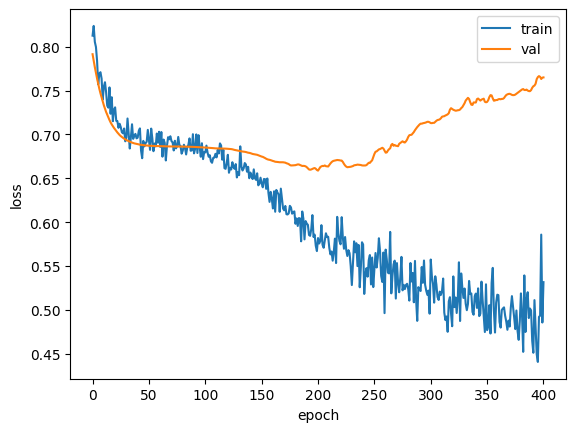

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
# plt.title(plt_title+plt_title2)
plt.show()

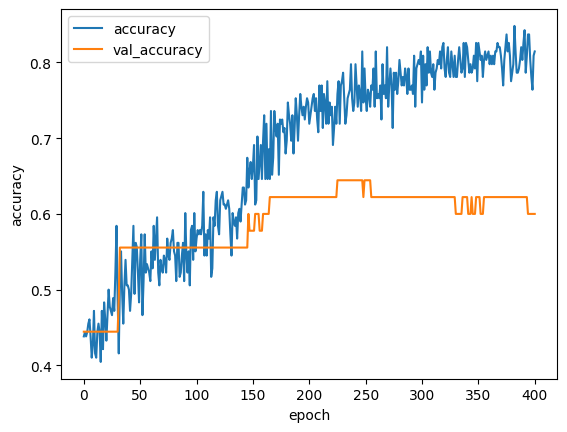

In [71]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_accuracy'])
# plt.title(plt_title+plt_title2)
plt.show()

In [82]:
# save feature columns
directory = f'./{com_name}/best_model_deep/'
save_to_pickle(directory+f'data_columns_{com_name}.pkl', data.columns)

In [ ]:
earlystopping_cb.stopped_epoch

In [72]:
model.evaluate(test_scaled, test_target)

2/2 [==============================] - 0s 3ms/step - loss: 0.7225 - accuracy: 0.5536


[0.722529947757721, 0.5535714030265808]

In [73]:
model_val = load_model('best_model.h5')
model_val.evaluate(test_scaled, test_target)

ValueError: in user code:

    File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1820, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1804, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1792, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1756, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_41" is incompatible with the layer: expected shape=(None, 6), found shape=(None, 80)


In [74]:
y_predict = model.predict(np.array(test_scaled))

2/2 [==============================] - 0s 2ms/step


In [75]:
y_predict_list = [1 if i > 0.5 else 0 for i in y_predict[:, 0]]

In [76]:
compare = [ [x, y] for x, y in zip(test_target, y_predict)]
# compare = [ [x, y] for x, y in zip(test_target, y_predict_list)]
compare # 실제값. 예측값

[[0, array([0.31606624], dtype=float32)],
 [0, array([0.31579894], dtype=float32)],
 [1, array([0.6377406], dtype=float32)],
 [1, array([0.315825], dtype=float32)],
 [1, array([0.43562686], dtype=float32)],
 [1, array([0.31585035], dtype=float32)],
 [1, array([0.63778377], dtype=float32)],
 [0, array([0.3216695], dtype=float32)],
 [1, array([0.63493913], dtype=float32)],
 [0, array([0.63730645], dtype=float32)],
 [1, array([0.31602833], dtype=float32)],
 [1, array([0.63761544], dtype=float32)],
 [0, array([0.32432777], dtype=float32)],
 [1, array([0.31580174], dtype=float32)],
 [1, array([0.3158888], dtype=float32)],
 [1, array([0.6371567], dtype=float32)],
 [1, array([0.3176332], dtype=float32)],
 [1, array([0.3245192], dtype=float32)],
 [0, array([0.58487034], dtype=float32)],
 [0, array([0.3157958], dtype=float32)],
 [1, array([0.6377022], dtype=float32)],
 [1, array([0.63767964], dtype=float32)],
 [1, array([0.6322206], dtype=float32)],
 [0, array([0.31580973], dtype=float32)],
 [1

In [77]:
from sklearn.metrics import precision_score, recall_score
# 정밀도 : 양성으로 예측된 것(TP+FP) 중 얼마나 많은 샘플이 진짜 양성(TP)인지 측정
precision_score(test_target, y_predict_list)  # 정밀도, 입력값의 순서 중요힘. (실제값, 예측값)

0.6956521739130435

In [78]:
# 재현율 : 전체 양성 샘플(TP+FN) 중에서 얼마나 많은 샘플이 진짜 양성(TP)인지 측정
recall_score(test_target, y_predict_list)  # 재현율, 입력값의 순서 중요힘. (실제값, 예측값)

0.47058823529411764

In [79]:
from sklearn.metrics import f1_score

f1_score(test_target, y_predict_list)

0.5614035087719297

In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_target, y_predict_list)

array([[15,  7],
       [18, 16]], dtype=int64)

In [59]:
from sklearn.metrics import roc_auc_score

roc_auc_score(test_target, y_predict_list)

0.59375

1. 정밀도, f1-score, 
2. confusion matrix ((1,1), (2,2), 두개가 큰 비중이면 good, (1,2)은 틀린것을 맞다라고 구분, (2,1)은 맞는 것을 틀린 것이다 라고 결정하는 항목) 따라서
    (2,2) -> (1,2) -> (1,1)로 확인하고. <br>
    (1,2)가 크면 모델 제외 (정밀도(precision = TP / (TP + FP) )가 높아야 함. 낮으면 손해를 보게 됨.), <br>
    재현율(Recall = TP / (TP + FN) ) 은 손해를 끼치지는 않음.
    
<img src="https://raw.githubusercontent.com/fasthill/My-gist/main/data/picture/confusion_matrix.png" width="800"/> <br>

In [49]:
directory_for_ml = '../data/data_for_ml/expand_date/'
ss = pd.read_csv(directory_for_ml+'df_sec_sel.csv', index_col=0)

In [45]:
df_o.head()

,retail_1,foreigner_1,institution_1,financial_1,invtrust_1,pension_1,privequity_1,bank_1,insurance_1,financeetc_1,...,high_2,low_2,close_2,vol_2,weekday,cr_00,cr_05,cr_10,cr_15,cr_20
2022-01-13,-2.060312,-0.265567,-4.015761,12.581059,-1.083067,-1.672140,2.352617,-1.119863,-10.187919,1.857143,...,0.010551,0.004796,0.025119,0.358099,2,1,1,0,0,0
2022-01-14,-0.777487,0.465750,-0.408941,-0.746129,-5.538462,-0.109941,-1.838948,-1.000000,-0.716094,-1.000000,...,0.024881,0.014406,0.038415,0.534943,3,0,0,0,0,0
2022-01-19,0.167478,0.321340,0.361733,-3.462559,2.925469,-3.572086,0.706991,-0.232143,-0.214444,-1.000000,...,-0.035964,-0.045077,-0.051765,0.860671,1,1,1,1,0,0
2022-01-27,-0.451563,-0.383784,-1.562342,-5096.000000,-0.855346,-4.989160,-2.970914,-0.173333,3.636364,-1.000000,...,-0.043903,-0.060795,-0.066584,1.283920,2,0,0,0,0,0
2022-01-28,1.251164,-0.653366,-29.363296,-1.110010,17.513043,3.281590,-1.158117,1.604839,0.226580,3.564103,...,-0.069939,-0.087179,-0.087179,0.464931,3,1,1,1,1,1
